### Data Analyst Nanodegree - Project 5

# Wrangle & Analyze "WeRateDogs" Dataset

### By: Lubna Alhenaki


### Table of Contents:
- [Introduction](#Introduction:)
- [Gathering data](#Gathering_data:)
- [Assessing data](#Assessing_data:)
- [Cleaning data](#Cleaning_data:)
- [Data Analyzing and Visualizing](#Storing_Analyzing_and_Visualizing:)
- [Conclusion](#Conclusion:)

### <a id='Introduction:'> Introduction:</a>

In this project I demonsrtize the skills I learned in data wrangling part of Udacity Data Analysis Nanodegree program.

The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.The main pourpos of WeRateDogs account is rates people's dogs with a humorous comment about the dog.By using Python and its libraries,I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

In [1]:
# import important libraries 

import pandas as pd #data handling
import numpy as np #array functions
import requests ## get data from server 
import tweepy # twitter API
import json # handel json data 
import re #text handling 
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

### <a id='Gathering data:'> Gathering Data:</a>

In this section, the data I will gather data from three different sources as shown in the following:

**Name: WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)</li>**
- Source: Udacity
- Method of gathering: Manual download


**Name: Tweet image predictions (image_predictions.tsv)</li>**
- Source: Udacity
- Method of gathering: Programmatical download via Requests

**Name: Additional Twitter data (tweet_json.txt)**
- Source: WeRateDogs™
- Method of gathering: API via Tweepy

#### 1. Enhanced Twitter Archive Data

The first step is downloaded the file from Udacity. Next, the file can be loaded directly into a dataframe via Pandas.

In [2]:

# load twitter archive
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
# use tweet id column as index
twitter_archive.set_index('tweet_id', inplace = True)

In [3]:
twitter_archive.head(3)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 2.  Image Predictions Data 

**The tweet image predictions** i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and I will be downloaded programmatically using the Requests library. So to gather this data I'm  going to define the file url, request this url and write the content of the response to a separate file then read it using dataframe.  

In [4]:
#URL downloaded programatically and get file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image-predictions1.tsv', 'wb').write(r.content)

#load image predecation 
image_predictions = pd.read_csv("image-predictions1.tsv",sep='\t')
# use tweet id column as index
image_predictions.set_index('tweet_id', inplace = True)
# display few lines
image_predictions.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API Data

Twitter API file contains tweet id, favorite count and retweet count. Data was provided by Udacity, downloaded manually then will be loaded from the tweet-json.txt file into a pandas data frame

In [5]:

# load twitter API data
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display few lines
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


### <a id='Assessing_data:'> Assessing Data:</a>

After gathering each of the above pieces of data, I will assess them visually and programmatically for quality and tidiness issues.This section will be divided into three sub-section as shown in the following:

 #### 1. Assess Enhanced Twitter Archive Data

In [6]:
# Take a look into ata
twitter_archive.head(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# print a summary of a DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [8]:
# print a statstic summary of a DataFrame
twitter_archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# check if ids are unique
twitter_archive.index.is_unique

True

In [10]:
# check name of dog
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
             ... 
Brutus          1
Timber          1
Sundance        1
Christoper      1
Ito             1
Name: name, Length: 957, dtype: int64

In [11]:
# check missing value 
twitter_archive.isnull().sum()

in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
# check ratings with denominator greather than 10
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the flo...,70
775096608509886464,"RT @dog_rates: After so many requests, this is...",11
758467244762497024,Why does this never happen at my front door......,150
740373189193256964,"After so many requests, this is Bretagne. She ...",11
731156023742988288,Say hello to this unbelievably well behaved sq...,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20
716439118184652801,This is Bluebert. He just saw that both #Final...,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,90


In [13]:
# check rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
# check for two or more urls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

In [15]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [16]:
# dogs categories
twitter_archive['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64


**Quality Issues found in the twitter_archive** 
- Delete columns that won't be used for analysis.
- There is missing value in most of columns 
- The name column contains incorrect name such as "None","a" ,and "an" 
- Correct denominators other than 10.
- we have 639 expanded urls which contain more than one url address.
- The timestamp has an incorrect datatype which is an object beside tweet_id should is an int datatype
- The source column contains unnecessary HTML code

**Tidiness Issues found in the twitter_archive**

- Not all tweets could be classified as (doggo, floofer, pupper or puppo)and all columns contain "None". Also, some dogs have more than one category assigned.Hence, it should be in one column






#### 2.  Assess Image Predictions Data 

In [17]:
# display sample of data
image_predictions.tail(10)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
# print a summary of a DataFrame
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [19]:
# print a statstic summary of a DataFrame
image_predictions.describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# check missing value
image_predictions.isnull().sum()

jpg_url    0
img_num    0
p1         0
p1_conf    0
p1_dog     0
p2         0
p2_conf    0
p2_dog     0
p3         0
p3_conf    0
p3_dog     0
dtype: int64

In [21]:
# Check jpg_url for duplicates
sum(image_predictions.jpg_url.duplicated())

#his data contains retweets

66

**Quality Issues found in the  Image Predictions** 

- The predicitions are incosist sometimes its lowercas and sometimes is uppercase
- There is an underscore instead of a whitespace between the words
- There are rows with no prediciton of a dog (neither in 1, 2 nor 3)
- There is a duplicated rows in column jpg_url

**Tidiness Issues found in the t Image Predictions**

- The prediction and confidence columns should be reduced to two columns - one for the prediction with the highest confidence (dog)
- Dataset should be merged with the twitter archive dataset by Twitter_ID.

#### 3. Assess Twitter API Data

In [22]:
# Get sample of data
twitter_api.sample(5)

,favorites,retweets
tweet_id,,
868552278524837888,10539,2240
892420643555336193,39467,8853
813066809284972545,8865,2276
718971898235854848,3818,1231
667530908589760512,501,264


In [23]:
# print a summary of a DataFrame
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [24]:
twitter_api.isnull().sum()

favorites    0
retweets     0
dtype: int64

In [25]:
# check if ids are unique
twitter_archive.index.is_unique

True


**Quality Issues in Twitter API Data**
- twitter archive dataset has 2356 entries, while twitter API data has 2354.

**Tidiness Issues in Twitter API Data**
- Dataset should be merged with the twitter archive dataset by Twitter_ID.

### <a id='Cleaning_data:'> Cleaning Data:</a>

In this section I will clean each of the issues mensioned in the assessing section. Overall,the cleaning tasks are as following:

- Merge the tables together
- Drop the replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos
- Fix the datatypes of the columns such as timestamp column
- Fix the wrong numerators - the floats on the one hand (replacement), the ones with multiple occurence of the pattern on the other (drop)
- Extract the source from html code
- Split the text range into two separate columns
- Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column
- Remove the wrong names of name column
- Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase

 #### 1. Clean Enhanced Twitter Archive Data

In [26]:

# create a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()

In [27]:
# display sample and shape of data 
twitter_archive_clean.sample(3)
print(twitter_archive_clean.shape)

(2356, 17)



**Define**

- The timestamp is string datatype ,so we must convert it to datetime.

**Code**

In [28]:
# convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

**Test**

In [29]:
print(twitter_archive_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 17 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null int64
floofer                       2356 non-null int64
pupper                        2356 non-null int64
puppo                         2356 non-null int64
number_categories             2356 non-nul

**Define**
- Dog classification (doggo, floofer, pupper or puppo) should be one column.
- Some dogs have more than one category assigned. I want to assign them to main types!!

**Code**

In [31]:
twitter_archive_clean.replace('None', '', inplace=True)

In [32]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

/Users/lubnaalhenaki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [33]:

# read dog types from text column
for index, column in twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_clean.loc[index, 'text']).lower():
            twitter_archive_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

**Test**

In [34]:
twitter_archive_clean.stage.value_counts()

0    1976
1     366
2      14
Name: stage, dtype: int64

In [32]:
# display sample of fixed data
twitter_archive_clean.sample(3)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,,,,,,
674800520222154752,NaN,NaN,2015-12-10 03:59:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674800520...,11,10,Tedders,0,NaN
750011400160841729,NaN,NaN,2016-07-04 17:00:26+00:00,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,1,Doggo
668989615043424256,NaN,NaN,2015-11-24 03:08:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615...,3,10,Bernie,0,NaN


In [33]:
twitter_archive_clean.dog_type.value_counts()

Pupper     271
Doggo      106
Puppo       36
Floofer     10
Name: dog_type, dtype: int64


**Define**

- Construct a correct links by using tweet id because We have 639 expanded URLs that contains more than one url address and 59 missing expanded urls


**Code**

In [34]:
# correct expanded URLs
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    



**Test**

In [35]:
twitter_archive_clean.tail(3)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,,,,,,
666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,0,NaN
666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,0,NaN
666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,0,NaN


**Define**

- The source column is not giving us any useful information Because the relevant information is always between two "> <", the information will be easy to extract.


**Code**

In [36]:
#https://stackoverflow.com/questions/3075130/what-is-the-difference-between-and-regular-expressions
twitter_archive_clean.source = twitter_archive_clean.source.str.extract("\>(.*?)\<", expand = True)

**Test**

In [37]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

**Define**

- Remove the wrong names from name column


**Code**

In [38]:
for name in ["None", "a", "by", "the"]:
    twitter_archive_clean["name"].replace(name, np.nan, inplace = True)

**Test**

In [39]:
twitter_archive_clean.name.value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Tucker     10
           ..
Willy       1
Barclay     1
Brudge      1
Fwed        1
Ester       1
Name: name, Length: 953, dtype: int64

**Define**

- Float ratings have been incorrectly read from the text of tweet gather correct rating when rating is a fraction.

**Code**

In [40]:
# convert both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

**Test**

In [41]:
twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
883482846933004288,This is Bella. She hopes her smile made you sm...,10.0,13.50
681340665377193984,I've been told there's a slight possibility he...,10.0,9.50
786709082849828864,"This is Logan, the Chow who lived. He solemnly...",10.0,9.75


#### 2.  Clean Image Predictions Data 

In [42]:

# create a copy of dataset
image_prediction_clean = image_predictions.copy()

In [43]:
# look into data
image_prediction_clean.sample(2)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
693262851218264065,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg,1,golden_retriever,0.989333,True,Labrador_retriever,0.007946,True,kuvasz,0.000749,True
674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False


**Define**

- Fix the breed column by replacing the "_" with a whitespace and make them all lowercase also Capitalize the first letter of each word

**Code**

In [44]:
# columns with dog breed
dog_breed_cols = ['p1', 'p2', 'p3']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace("_", " ").str.title()

**Test**

In [45]:
image_prediction_clean.sample(2)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston Bull,0.306910,True,Siamese Cat,0.191218,False,Chihuahua,0.189288,True
673708611235921920,https://pbs.twimg.com/media/CVl-Z0dWcAAs7wr.jpg,1,Golden Retriever,0.936333,True,Cocker Spaniel,0.024211,True,Labrador Retriever,0.009435,True


**Define**

- Delete the duplicate jpg URLs (Around 66 as shown in previous section)

**Code**

In [46]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')


**Test**

In [47]:
sum(image_prediction_clean['jpg_url'].duplicated())

0


**Define**

Only 2075 images have been classified as dog images for top prediction

If 1st predictions is not a dog breed, then use dog breed predicted in the 2nd or 3rd predicion.

**Code**

In [48]:
image_prediction_clean.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [49]:
# construct function to determine dog breed in case no breed found, set value to NaN

def get_breed(row):
    if row['p1_dog'] == True:
        return row['p1'], row['p1_conf']
    if row['p2_dog'] == True:
        return row['p2'], row['p2_conf']
    if row['p3_dog'] == True:
        return row['p3'], row['p3_conf']
    return np.nan, np.nan

# create new columns with data and apply function to dataset

image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_prediction_clean.index) 

# drop old columns
image_prediction_clean.drop(['p1',
                       'p1_conf',
                       'p1_dog',
                       'p2',
                       'p2_conf',
                       'p2_dog',
                      'p3',
                       'p3_conf',
                       'p3_dog'],
                      axis=1, inplace=True)

# drop rows without dog breed prediction
image_prediction_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

**Test**

In [50]:

# Test
# display sample of cleaned dataset
image_prediction_clean.sample(3)

,jpg_url,img_num,breed_predicted,prediction_confidence
tweet_id,,,,
831262627380748289,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,Cocker Spaniel,0.263323
771500966810099713,https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg,1,Labrador Retriever,0.833952
702539513671897089,https://pbs.twimg.com/media/Cb_r8qTUsAASgdF.jpg,3,Pomeranian,0.714367


#### 3. Clean Twitter API Data


There is no need to perform cleaning tasks to this dataset because its looks clean except for merging it with the Twitter archive data

**Define**
- Merge all the tables together

**Code**

In [51]:
#Mearge all tabels by twitter_id column
twitter_archive_master = pd.merge(twitter_archive_clean, twitter_api, on = "tweet_id", how = "outer")


In [52]:
twitter_archive_master = pd.merge(twitter_archive_master, image_prediction_clean, on = "tweet_id", how = "outer")

**Test**

In [53]:
twitter_archive_master.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,favorites,retweets,jpg_url,img_num,breed_predicted,prediction_confidence
tweet_id,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,0,NaN,39467.0,8853.0,NaN,NaN,NaN,NaN
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,0,NaN,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,0,NaN,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,0,NaN,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador Retriever,0.168086
891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,0,NaN,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712


In [54]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 20 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1547 non-null object
number_categories             2356 non-null int64
dog_type                      423 non-null object
favorites                     2354 non-null float64
retweets                      2354 non-null float64
jpg_url                       1691

In [55]:
#Store the clean DataFrame in a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv')

### <a id='Storing_Analyzing_and_Visualizing:'> Data Analyzing and Visualizing:</a>

In this section I will find three insights and one visualization. The following question will be answered.

- What is the most common dog Breed? or in other word, Which breed gets retweeted and favorited the most overall?
- Is there a pattern visible in the timing of the tweets? Like day of week? 
- Waht is the statues of account popularity over time? The answer is based on the numbers of favorites and retweets over time. 




In [56]:

# display basic data statstic summary
twitter_archive_master.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,number_categories,favorites,retweets,img_num,prediction_confidence
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2356.000000,2354.000000,2354.000000,1691.000000,1691.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.063680,10.455433,0.167233,8080.968564,3164.797366,1.215257,0.549313
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.839085,6.745237,0.388863,11814.771334,5284.770364,0.575458,0.299570
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000010
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,0.000000,1415.000000,624.500000,1.000000,0.302443
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,0.000000,3603.500000,1473.500000,1.000000,0.548907
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,0.000000,10122.250000,3652.000000,1.000000,0.821876
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,2.000000,132810.000000,79515.000000,4.000000,0.999956


In [57]:
# Look into sample of data
twitter_archive_master.sample(3)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,favorites,retweets,jpg_url,img_num,breed_predicted,prediction_confidence
tweet_id,,,,,,,,,,,,,,,,,,,,
748699167502000129,NaN,NaN,2016-07-01 02:06:06+00:00,Twitter for iPhone,Meet Tripp. He's being eaten by a sherk and do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748699167...,11.0,10.0,Tripp,0,NaN,5213.0,1814.0,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,1.0,Pembroke,0.849029
821407182352777218,NaN,NaN,2017-01-17 17:21:47+00:00,Twitter for iPhone,This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,14.0,10.0,Sundance,1,Doggo,13075.0,5053.0,https://pbs.twimg.com/ext_tw_video_thumb/82140...,1.0,Irish Setter,0.505496
667801013445750784,NaN,NaN,2015-11-20 20:25:43+00:00,Twitter for iPhone,OMIGOD 12/10 https://t.co/SVMF4Frf1w,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667801013...,12.0,10.0,NaN,0,NaN,346.0,101.0,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,1.0,Flat-Coated Retriever,0.508392


In [58]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 20 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1547 non-null object
number_categories             2356 non-null int64
dog_type                      423 non-null object
favorites                     2354 non-null float64
retweets                      2354 non-null float64
jpg_url                       1691

In [59]:
#Check columns

**Insight Number One**

In [60]:

# Display the number for each dog's breed 
twitter_archive_master['breed_predicted'].value_counts()


Golden Retriever        158
Labrador Retriever      108
Pembroke                 95
Chihuahua                91
Pug                      63
                       ... 
Clumber                   1
Irish Wolfhound           1
Entlebucher               1
Bouvier Des Flandres      1
Silky Terrier             1
Name: breed_predicted, Length: 113, dtype: int64

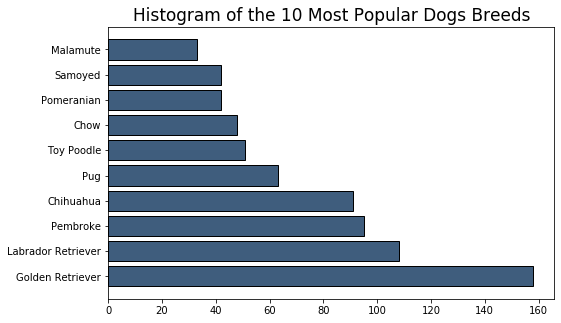

In [61]:
# plot 10 most popular dog breeds
dog_breeds = pd.DataFrame(twitter_archive_master.breed_predicted.value_counts()[:10])



plt.figure(figsize=(8,5)) 


bar_list = plt.barh(dog_breeds.index,
          dog_breeds.breed_predicted,color="#3F5D7D", edgecolor="k")


plt.title("Histogram of the 10 Most Popular Dogs Breeds",fontsize=17)

plt.xlabel(xlabel='',
           fontsize=15)

plt.ylabel(ylabel='',
           fontsize=15)

plt.show()

From the above figure we can find The golden retrievers with a count of 154 and labrador retrievers with a count of 105 are mostly displayed in the images 

**Insight Number Two**

In [62]:
twitter_archive_master["DayOfWeek"] = twitter_archive_master["timestamp"].apply(lambda x: x.dayofweek)


In [63]:
# Check number of columns 
twitter_archive_master.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'number_categories', 'dog_type',
       'favorites', 'retweets', 'jpg_url', 'img_num', 'breed_predicted',
       'prediction_confidence', 'DayOfWeek'],
      dtype='object')

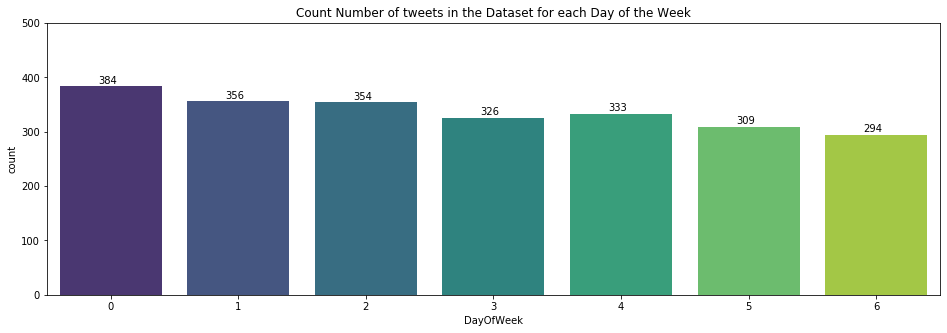

In [64]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "DayOfWeek", data = twitter_archive_master, palette = "viridis")
ax.set_title("Count Number of tweets in the Dataset for each Day of the Week");

ax.set_ylim(0, 500)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))


As we can see from the above figure, the most posts are during the Monday.In the other hand, the period from Tuesday to Friday it is nearly the same number of posts. While On the weekend the Twitter profile tweets a little bit less.

**Insight Number Three**

/Users/lubnaalhenaki/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


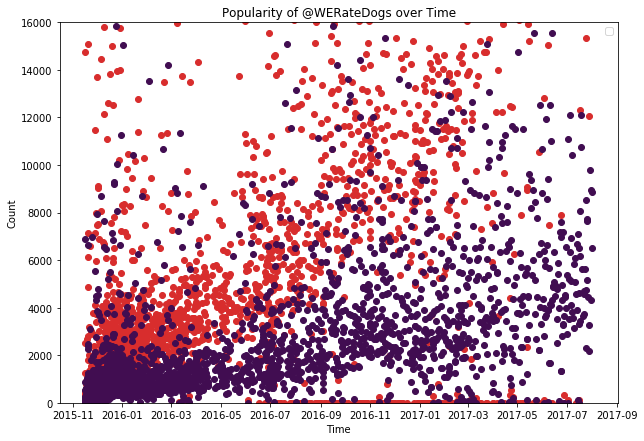

In [65]:

d = pd.DataFrame(twitter_archive_master.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,twitter_archive_master.favorites, color="#d82d2d")
ax.plot_date(d,twitter_archive_master.retweets, color="#410d51")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()

We can suppose that tweets were getting more and more favorites and retweets as WeRateDog account was becoming more and more popular. Overall, The account gained popularity over time as it is clear from the above figure.

### <a id='Conclusion:'> Conclusion:</a>

In this project, we went through a whole data wrangling process. First, we start gathering data from three different sources including the programmatical, manual download as also the gathering via an API. Next, the cleaning part covered a lot of techniques like regular expressions found in the assessing stage. Finally, we answered three interesting questions and visualize data. 